In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('kaggle-titanic-train.csv')
x_test = pd.read_csv('kaggle-titanic-test.csv')

In [3]:
data_copy = train_data.copy()
test_copy = x_test.copy()
pid=test_copy.PassengerId

<h1>Exploratory Data Analysis</h1>

<h2> * RELATIONSHIP BETWEEN TICKET CLASS AND SURVIVAL</h2>

In [4]:
train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).groups # Know which index are of Pclass 1,2 or 3
Pclass_df = train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by="Survived",ascending=False)
Pclass_df.columns

Index(['Pclass', 'Survived'], dtype='object')

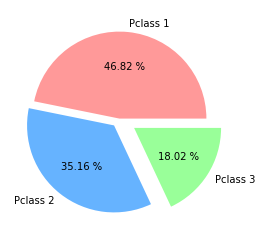

None


In [6]:
import matplotlib.pyplot as plt
labels=['Pclass 1','Pclass 2','Pclass 3']
sizes=[]
colors = ['#ff9999','#66b3ff','#99ff99'] # Choosing lighter shades
explode=[0,0.1,0.2]
for key in Pclass_df.Survived:
    sizes.append(key)
    
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,explode=explode,colors=colors,autopct="%.2f %%")
print(plt.show())

>>>   WE CONCLUDE THAT ***BETTER TICKET CLASS***  MEANT ***HIGHER*** RATE OF SURVIVAL

<h2> * RELATIONSHIP BETWEEN GENDER AND SURVIVAL</h2>

In [7]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).groups
Gender_df=train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by="Survived",ascending=False)
# mean is sum/size i.e number of 1's / number of 1's + number of 0's , which is actually the probability of survival
Gender_df

,Sex,Survived
0,female,0.742038
1,male,0.188908


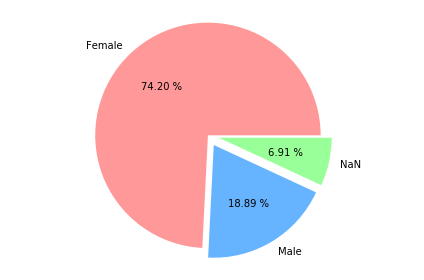

In [8]:
labels=['Female','Male','NaN']
sizes=[]
explode=[0,0.1,0.1]
colors = ['#ff9999','#66b3ff','#99ff99']
nan_sum=0
for size in Gender_df.Survived:
    nan_sum+=size
    sizes.append(size)
nan_sum=1-nan_sum
sizes.append(nan_sum)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,explode=explode,autopct="%.2f %%",colors=colors)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

>>>   WE CONCLUDE THAT ***FEMALE*** HAVE ***HIGHER*** RATE OF SURVIVAL

<h2> *RELATIONSHIP BETWEEN Port of Embarkation AND SURVIVAL </h2>

*C = Cherbourg, Q = Queenstown, S = Southampton*

In [9]:
em_df = train_data[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()
em_df

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


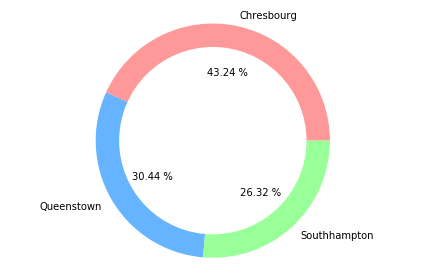

In [10]:
labels=['Chresbourg','Queenstown','Southhampton']
sizes=[]
colors = ['#ff9999','#66b3ff','#99ff99']
nan_sum=0
for size in em_df.Survived:
    nan_sum+=size
for size in em_df.Survived:
    sizes.append(size/nan_sum)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct="%.2f %%",colors=colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white',linewidth=1.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

>>>   WE CONCLUDE THAT ***Embarking from Cherbourg*** HAS ***HIGHEST*** RATE OF SURVIVAL

<h3> *RELATIONSHIP BETWEEN the number of siblings / spouses aboard the Titanic AND SURVIVAL </h3>

In [11]:
sibsp_df=train_data[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()
sibsp_df

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


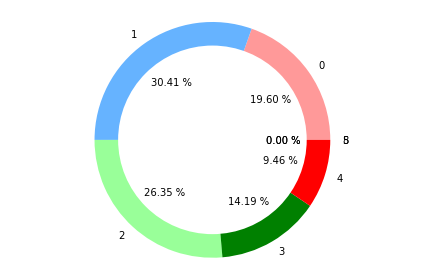

In [12]:
labels_sibsp=['0','1','2','3','4','5','8']
sizes=[]
colors = ['#ff9999','#66b3ff','#99ff99','green','red','purple','yellow']
nan_sum=0
for size in sibsp_df.Survived:
    nan_sum+=size
for size in sibsp_df.Survived:
    sizes.append(size/nan_sum)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels_sibsp,autopct="%.2f %%",colors=colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white',linewidth=1.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

>>   WE CONCLUDE THAT HAVING ***1/2 sibling or spouse abroad the Titanic*** HAS ***VERY HIGH*** RATE OF SURVIVAL

<h3> *RELATIONSHIP BETWEEN the number of parents / children aboard the Titanic AND SURVIVAL </h3>

In [13]:
parch_df=train_data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()
parch_df

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


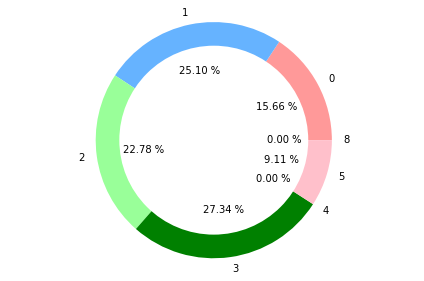

In [14]:
labels_parch=['0','1','2','3','4','5','6']
sizes=[]
colors = ['#ff9999','#66b3ff','#99ff99','green','red','pink','yellow']
nan_sum=0
for size in parch_df.Survived:
    nan_sum+=size
for size in parch_df.Survived:
    sizes.append(size/nan_sum)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels_sibsp,autopct="%.2f %%",colors=colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white',linewidth=1.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

>>   WE CONCLUDE THAT HAVING ***1/2/3 children or parents abroad the Titanic*** HAS ***VERY HIGH*** RATE OF SURVIVAL

<h3> *RELATIONSHIP BETWEEN AGE OF PASSENGER AND SURVIVAL </h3>

In [15]:
print("The size of training data that we have :",train_data.shape[0])

y=(train_data.Survived==1)
train_survived=train_data[y]
train_survived.shape
print("The number of survived people examples in training data :",train_survived.shape[0])

y=(train_data.Survived==0)
train_not_survived=train_data[y]
print("The number of people not survived examples from training data :",train_not_survived.shape[0])

max_age=train_data.Age.max()
min_age=train_data.Age.min()

The size of training data that we have : 891
The number of survived people examples in training data : 342
The number of people not survived examples from training data : 549


      Survived = 1            Survived = 0


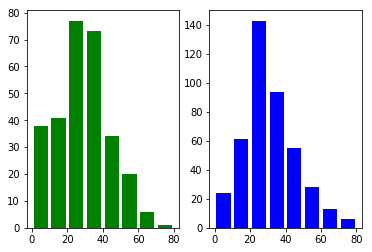

In [16]:
fig,axes=plt.subplots(1,2)
bin_width=10
axes[0].hist(x=train_survived.Age,bins=range(int(min_age),int(max_age+bin_width),bin_width),cumulative=False,histtype='bar',color='green',alpha=1,rwidth=0.8) # alpha is for opaqueness of bar graph
axes[0].xticks=[0,20,40,60,80]
axes[1].hist(x=train_not_survived.Age,bins=range(int(min_age),int(max_age+bin_width),bin_width),cumulative=False,histtype='bar',color='blue',alpha=1,rwidth=0.8) # alpha is for opaqueness of bar graph
print('      Survived = 1','          ','Survived = 0')

## For Ages between 0 and 5

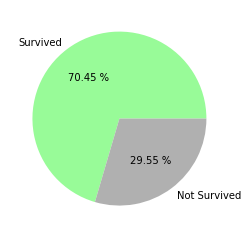

In [17]:
ages_0to15 = train_data[(train_data.Age>=0) & (train_data.Age<=5)]
ages_0to15_survived=(ages_0to15.Survived==1)
ages_0to15_not_survived=(ages_0to15.Survived==0)
num_survived=ages_0to15[ages_0to15_survived].shape[0]
num_not_survived=ages_0to15[ages_0to15_not_survived].shape[0]
num_survived,num_not_survived
total=num_survived+num_not_survived
sizes=[num_survived/total,num_not_survived/total]
plt.pie(sizes,labels=['Survived','Not Survived'],autopct="%.2f %%",colors=['#98FB98','000080'])
plt.show()

>>   Around ***71%*** children aged between ***0 and 5*** have ***Survived*** 

## For Ages between 15 and 25

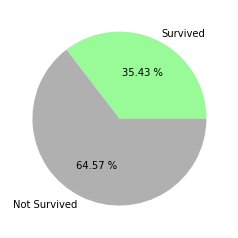

In [18]:
ages_0to15 = train_data[(train_data.Age>=15) & (train_data.Age<=25)]
ages_0to15_survived=(ages_0to15.Survived==1)
ages_0to15_not_survived=(ages_0to15.Survived==0)
num_survived=ages_0to15[ages_0to15_survived].shape[0]
num_not_survived=ages_0to15[ages_0to15_not_survived].shape[0]
num_survived,num_not_survived
total=num_survived+num_not_survived
sizes=[num_survived/total,num_not_survived/total]
plt.pie(sizes,labels=['Survived','Not Survived'],autopct="%.2f %%",colors=['#98FB98','000080'])
plt.show()

>>   Around ***65%*** people aged between ***15 and 25 did not survive*** 

## For Ages between 25 and 50

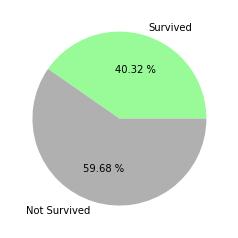

In [19]:
ages_0to15 = train_data[(train_data.Age>=25) & (train_data.Age<=50)]
ages_0to15_survived=(ages_0to15.Survived==1)
ages_0to15_not_survived=(ages_0to15.Survived==0)
num_survived=ages_0to15[ages_0to15_survived].shape[0]
num_not_survived=ages_0to15[ages_0to15_not_survived].shape[0]
num_survived,num_not_survived
total=num_survived+num_not_survived
sizes=[num_survived/total,num_not_survived/total]
plt.pie(sizes,labels=['Survived','Not Survived'],autopct="%.2f %%",colors=['#98FB98','000080'])
plt.show()

>>   Around ***60%*** people aged between ***25 and 50 did not survive*** 

## For Ages between 60 and 80

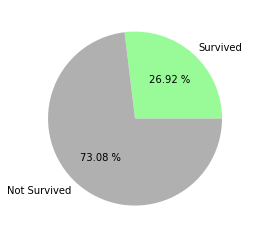

In [20]:
ages_0to15 = train_data[(train_data.Age>=60) & (train_data.Age<=80)]
ages_0to15_survived=(ages_0to15.Survived==1)
ages_0to15_not_survived=(ages_0to15.Survived==0)
num_survived=ages_0to15[ages_0to15_survived].shape[0]
num_not_survived=ages_0to15[ages_0to15_not_survived].shape[0]
num_survived,num_not_survived
total=num_survived+num_not_survived
sizes=[num_survived/total,num_not_survived/total]
plt.pie(sizes,labels=['Survived','Not Survived'],autopct="%.2f %%",colors=['#98FB98','000080'])
plt.show()

>>   Around ***73%*** people aged between ***60 and 80 did not survive*** 

# DATA CLEANING

In [21]:
data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
data_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
del data_copy['PassengerId']
del data_copy['Name']
del data_copy['Ticket']
del data_copy['Cabin']
del data_copy['Fare']
del test_copy['PassengerId']
del test_copy['Name']
del test_copy['Ticket']
del test_copy['Cabin']
del test_copy['Fare']

In [24]:
data_copy.Age.fillna(data_copy.Age.mean(),inplace=True)
data_copy.Embarked.fillna(data_copy.Embarked.mode()[0],inplace=True)
test_copy.Age.fillna(data_copy.Age.mean(),inplace=True)
test_copy.Embarked.fillna(data_copy.Embarked.mode()[0],inplace=True)

In [25]:
def evalGender(gender):
    if gender=='male':
        return 1
    return 0

In [26]:
data_copy['Sex'] = [evalGender(gender) for gender in data_copy['Sex']] 
test_copy['Sex'] = [evalGender(gender) for gender in test_copy['Sex']] 

In [27]:
dummies=[]
cols=["Pclass","Embarked"]
for col in cols:
    dummies.append(pd.get_dummies(data_copy[col]))
all_dummies=pd.concat(dummies,axis=1)
data_copy=pd.concat((all_dummies,data_copy),axis=1)

dummies=[]
cols=["Pclass","Embarked"]
for col in cols:
    dummies.append(pd.get_dummies(test_copy[col]))
all_dummies_test=pd.concat(dummies,axis=1)
test_copy=pd.concat((all_dummies_test,test_copy),axis=1)

In [28]:
del data_copy["Embarked"]
del data_copy["Pclass"]
del test_copy["Embarked"]
del test_copy["Pclass"]

In [29]:
del data_copy["SibSp"]
del data_copy["Parch"]
del test_copy["SibSp"]
del test_copy["Parch"]

In [30]:
Y_train=data_copy["Survived"]
del data_copy["Survived"]
X_train=data_copy.values
X_test=test_copy.values

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,Y_train)
clf.score(X_train,Y_train)

/home/tanishqsaluja/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7934904601571269

In [33]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [41]:
model = Sequential()

In [42]:
# Add the layers
layer1 = Dense(units=32,activation='relu',input_dim=8)
model.add(layer1)
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [43]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
# Fitting the model
model.fit(X_train,Y_train,epochs=50,batch_size=50)

Epoch 1/50
891/891 [==============================] - 1s 2ms/step - loss: 0.6788 - acc: 0.5466
Epoch 2/50
891/891 [==============================] - 0s 28us/step - loss: 0.6329 - acc: 0.6712
Epoch 3/50
891/891 [==============================] - 0s 33us/step - loss: 0.5940 - acc: 0.6925
Epoch 4/50
891/891 [==============================] - 0s 25us/step - loss: 0.5589 - acc: 0.7508
Epoch 5/50
891/891 [==============================] - 0s 34us/step - loss: 0.5299 - acc: 0.7935
Epoch 6/50
891/891 [==============================] - 0s 35us/step - loss: 0.5068 - acc: 0.7890
Epoch 7/50
891/891 [==============================] - 0s 27us/step - loss: 0.4866 - acc: 0.8002
Epoch 8/50
891/891 [==============================] - 0s 25us/step - loss: 0.4709 - acc: 0.8081
Epoch 9/50
891/891 [==============================] - 0s 28us/step - loss: 0.4615 - acc: 0.8081
Epoch 10/50
891/891 [==============================] - 0s 28us/step - loss: 0.4531 - acc: 0.8047
Epoch 11/50
891/891 [===================

In [45]:
predictions = model.predict(X_test)
model.evaluate(X_train,Y_train)

891/891 [==============================] - 0s 87us/step


[0.41507722850466683, 0.8170594832578759]

In [46]:
import csv

In [47]:
csv_file=open('Kaggle-Titanic-Predictions.csv','w')

In [48]:
csv_writer=csv.writer(csv_file)

In [49]:
csv_writer.writerow(['PassengerId','Survived']) 

22

In [50]:
for id,pred in zip(pid,predictions):
    val=0
    if pred>=0.5:
        val=1
    else:
        val=0
    csv_writer.writerow([id,val])

In [51]:
csv_file.close()